# Custom Planner

## Load Map

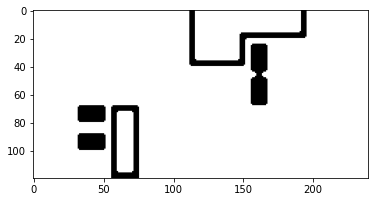

In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

map_w, map_h = 240, 120

map_img = cv2.imread('maps/map_parking.png', cv2.IMREAD_GRAYSCALE)
map_img = cv2.resize(map_img, dsize=(map_w, map_h), interpolation=cv2.INTER_LINEAR)
ret, map_img = cv2.threshold(map_img, 127, 255, 0)
plt.imshow(map_img, cmap='gray')

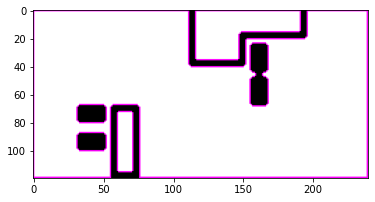

In [2]:
img_show = map_img.copy()
img_show = cv2.cvtColor(img_show, cv2.COLOR_GRAY2BGR)

contours, hierarchy = cv2.findContours(map_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img_show, contours, -1, (255, 0, 255), 1)  # blue

plt.imshow(img_show)

In [3]:
map_obs_x, map_obs_y = [], []
N = len(contours)
for cont in contours:
    map_obs_x = np.append(map_obs_x, cont[:,0,0]).astype(np.float64)
    map_obs_y = np.append(map_obs_y, cont[:,0,1]).astype(np.float64)

# Set Initial parameters
start = [10.0, 10.0, np.deg2rad(90.0)]
goal = [220.0, 20.0, np.deg2rad(-90.0)]

print("start : ", start)
print("goal : ", goal)

start :  [10.0, 10.0, 1.5707963267948966]
goal :  [220.0, 20.0, -1.5707963267948966]


In [4]:
import math

def plot_arrow(x, y, yaw, length=1.0, width=0.5, fc="g", ec="g"):
    if not isinstance(x, float):
        for (ix, iy, iyaw) in zip(x, y, yaw):
            plot_arrow(ix, iy, iyaw)
    else:
        plt.arrow(x, y, length * math.cos(yaw), length * math.sin(yaw),
                  fc=fc, ec=ec, head_width=width, head_length=width)
        plt.plot(x, y)

In [5]:
XY_GRID_RESOLUTION = 2.0  # [m]
YAW_GRID_RESOLUTION = np.deg2rad(15.0)  # [rad]
MOTION_RESOLUTION = 0.1  # [m] path interpolate resolution
N_STEER = 20  # number of steer command
VR = 1.0  # robot radius

SB_COST = 100.0  # switch back penalty cost
BACK_COST = 5.0  # backward penalty cost
STEER_CHANGE_COST = 5.0  # steer angle change penalty cost
STEER_COST = 1.0  # steer angle change penalty cost
H_COST = 5.0  # Heuristic cost

path found


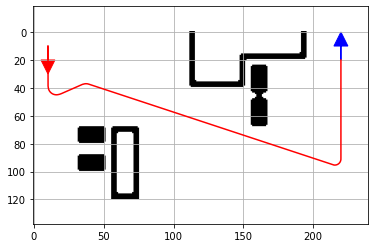

done!!


In [6]:
import hybrid_a_star as astar

obs_x, obs_y = map_obs_x.tolist(), map_obs_y.tolist()

path = astar.hybrid_a_star_planning(
    start, goal, obs_x, obs_y, XY_GRID_RESOLUTION, YAW_GRID_RESOLUTION)

x = path.x_list
y = path.y_list
yaw = path.yaw_list

# plt.scatter(obs_x, obs_y)
plt.imshow(map_img, cmap='gray')

plt.plot(x, y, "-r", label="Hybrid A* path")
plt.grid(True)

plot_arrow(start[0], start[1], start[2], length=10.0, width=10, fc="r", ec="r")
plot_arrow(goal[0], goal[1], goal[2], length=10.0, width=10, fc="b", ec="b")

plt.axis("equal")
plt.show()

print("done!!")

In [7]:
import matplotlib.pyplot as plt

In [1]:
from q10Planner import Q10Planner

In [3]:
b = Q10Planner()

In [6]:
b.load_map(test)

In [5]:
test = cv2.imread('maps/map_parking.png', cv2.IMREAD_GRAYSCALE)

In [7]:
start = [10.0, 10.0, np.deg2rad(90.0)]
goal = [220.0, 20.0, np.deg2rad(-90.0)]

path = b.planning(start, goal)

path found


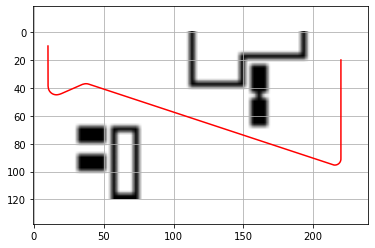

In [14]:
x = path.x_list
y = path.y_list
yaw = path.yaw_list

plt.imshow(cv2.resize(test, (240,120)), cmap='gray')

plt.plot(x, y, "-r", label="Hybrid A* path")
plt.grid(True)

plt.axis("equal")
plt.show()

In [12]:
path